In [9]:
import pandas as pd

def load_medicine_database(file_path):
    return pd.read_excel(file_path)

def get_drug_info(df, drug_name, strength):
    drug = df[df['Generic'].str.lower() == drug_name.lower()].iloc[0]
    
    max_dose = drug['Max dose (mg)']
    frequency = drug['Frequency'].lower()
    
    if 'twice' in frequency:
        daily_max = max_dose * 2
    elif 'three times' in frequency:
        daily_max = max_dose * 3
    elif 'four times' in frequency:
        daily_max = max_dose * 3
    else:
        daily_max = max_dose
    
    fraction = strength / daily_max
    half_life_low = drug['Half Life Low']
    half_life_high = drug['Half Life High']
    
    return {
        'fraction': fraction,
        'half_life': f"{half_life_low} - {half_life_high} hours",
        'dosing_schedule': drug['Frequency']
    }

def main():
    file_path = 'MedList.xlsx'  # Update this with the correct file path
    df = load_medicine_database(file_path)
    
    while True:
        drug_name = input("Enter the drug name (or 'quit' to exit): ")
        if drug_name.lower() == 'quit':
            break
        
        try:
            strength = float(input("Enter the strength in mg: "))
            drug_info = get_drug_info(df, drug_name, strength)
            
            print(f"\nDrug: {drug_name}")
            print(f"Strength: {strength} mg")
            print(f"Fraction of maximum daily dose: {drug_info['fraction']:.2%}")
            print(f"Half-life: {drug_info['half_life']}")
            print(f"Dosing schedule: {drug_info['dosing_schedule']}")
        except IndexError:
            print(f"Drug '{drug_name}' not found in the database.")
        except ValueError:
            print("Invalid strength. Please enter a numeric value.")
        except Exception as e:
            print(f"An error occurred: {str(e)}")
        
        print()

if __name__ == "__main__":
    main()


Drug: Perampanel
Strength: 12.0 mg
Fraction of maximum daily dose: 100.00%
Half-life: 105.0 - 105.0 hours
Dosing schedule: daily




Enter the dose schedule for 10 doses (1 for taken, 0 for missed):


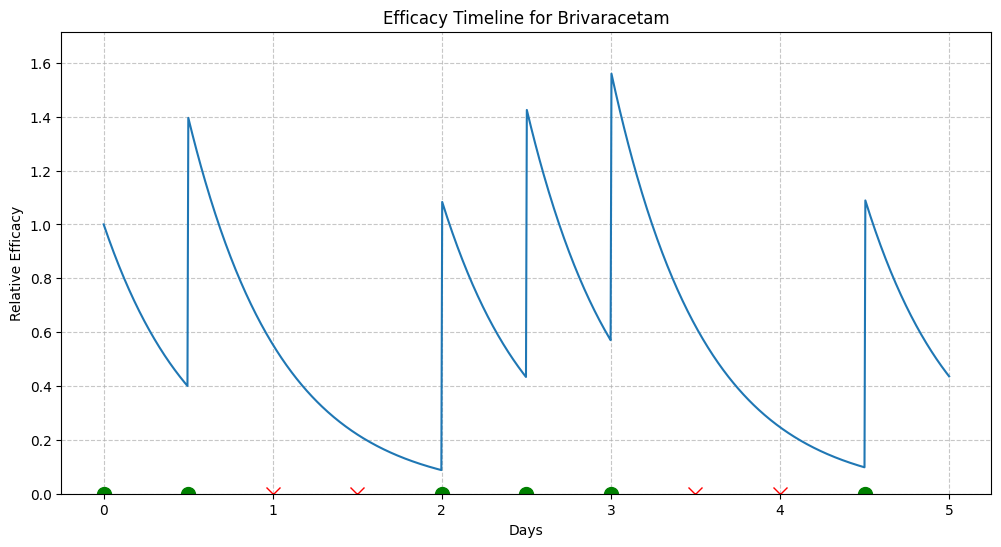

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def load_medicine_database(file_path):
    return pd.read_excel(file_path)

def get_drug_info(df, drug_name):
    drug = df[df['Generic'].str.lower() == drug_name.lower()].iloc[0]
    
    max_dose = drug['Max dose (mg)']
    frequency = drug['Frequency'].lower()
    
    if 'twice' in frequency:
        daily_doses = 2
    elif 'three times' in frequency:
        daily_doses = 3
    else:
        daily_doses = 1
    
    half_life_low = drug['Half Life Low']
    half_life_high = drug['Half Life High']
    half_life = (half_life_low + half_life_high) / 2  # Use average half-life
    
    return {
        'max_dose': max_dose,
        'daily_doses': daily_doses,
        'half_life': half_life,
        'dosing_schedule': drug['Frequency']
    }

def calculate_efficacy(drug_info, dose_schedule, time_points):
    half_life = drug_info['half_life']
    decay_rate = np.log(2) / half_life
    efficacy = np.zeros_like(time_points, dtype=float)
    
    for i, dose_taken in enumerate(dose_schedule):
        if dose_taken:
            dose_time = i * 24 / drug_info['daily_doses']
            efficacy += np.where(time_points >= dose_time, 
                                 np.exp(-decay_rate * (time_points - dose_time)), 
                                 0)
    
    return efficacy

def plot_efficacy_timeline(drug_name, drug_info, dose_schedule, days):
    time_points = np.linspace(0, 24 * days, 1000)
    efficacy = calculate_efficacy(drug_info, dose_schedule, time_points)
    
    plt.figure(figsize=(12, 6))
    plt.plot(time_points / 24, efficacy)
    plt.title(f"Efficacy Timeline for {drug_name}")
    plt.xlabel("Days")
    plt.ylabel("Relative Efficacy")
    plt.ylim(0, max(efficacy) * 1.1)
    
    # Add markers for doses
    for i, dose_taken in enumerate(dose_schedule):
        marker = 'o' if dose_taken else 'x'
        color = 'green' if dose_taken else 'red'
        plt.plot(i / drug_info['daily_doses'], 0, marker, color=color, markersize=10)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def main():
    file_path = 'MedList.xlsx'  # Update this with the correct file path
    df = load_medicine_database(file_path)
    
    drug_name = input("Enter the drug name: ")
    try:
        drug_info = get_drug_info(df, drug_name)
    except IndexError:
        print(f"Drug '{drug_name}' not found in the database.")
        return
    
    days = int(input("Enter the number of days for the timeline: "))
    total_doses = days * drug_info['daily_doses']
    
    print(f"\nEnter the dose schedule for {total_doses} doses (1 for taken, 0 for missed):")
    dose_schedule = []
    for i in range(total_doses):
        while True:
            dose = input(f"Dose {i+1}: ")
            if dose in ['0', '1']:
                dose_schedule.append(int(dose))
                break
            else:
                print("Invalid input. Please enter 0 or 1.")
    
    plot_efficacy_timeline(drug_name, drug_info, dose_schedule, days)

if __name__ == "__main__":
    main()


Simulation Results for Cannabidiol*:
0% Adherence: 74 seizures


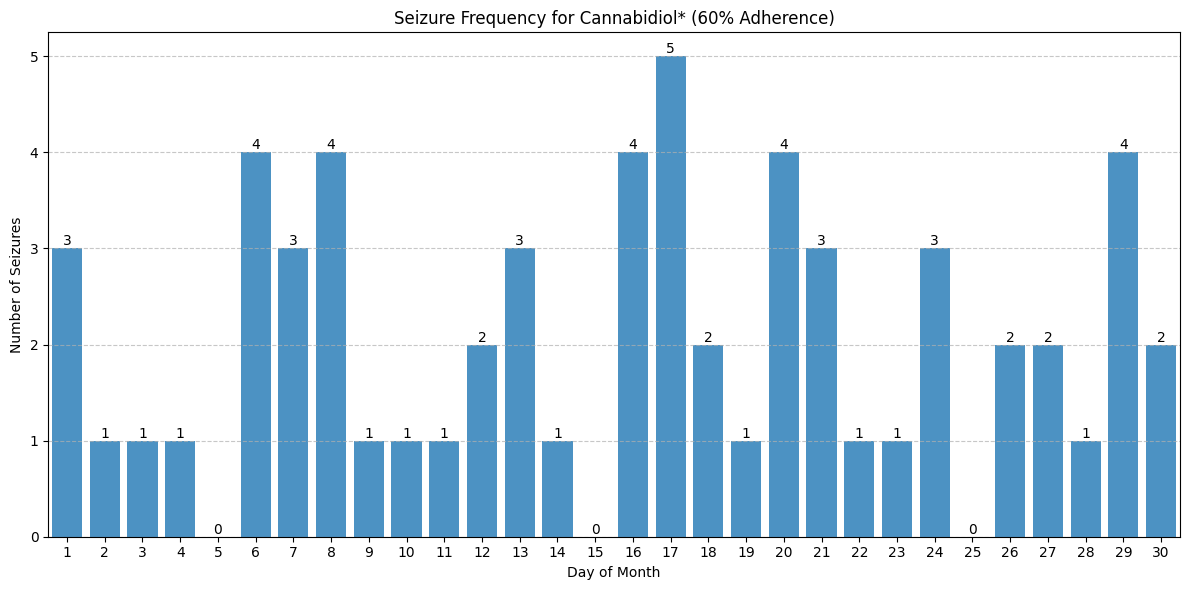

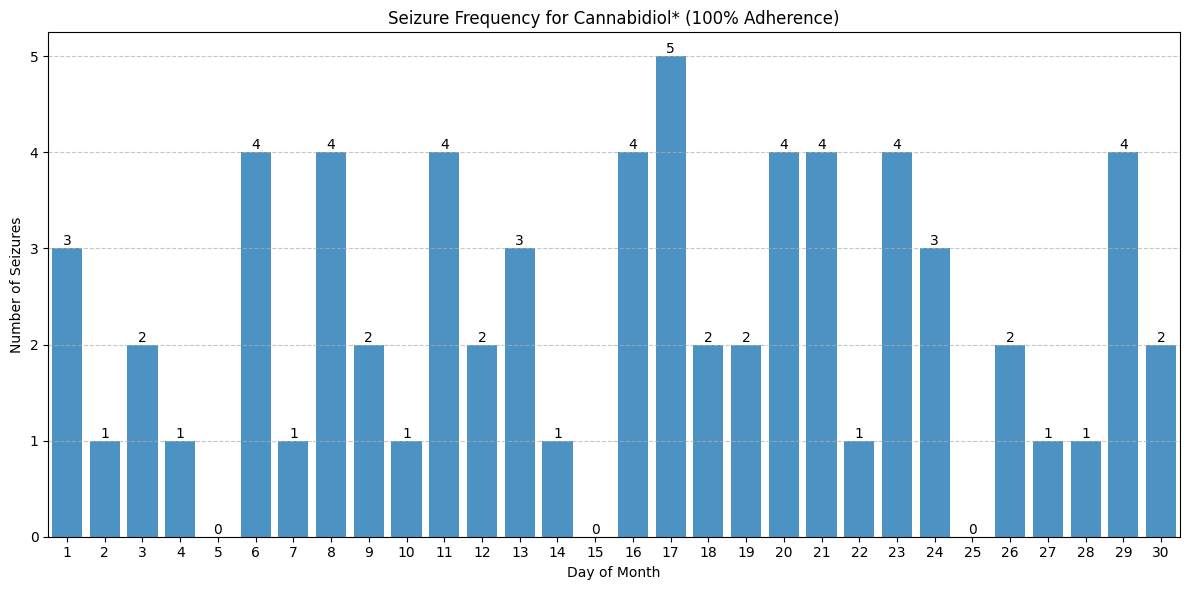

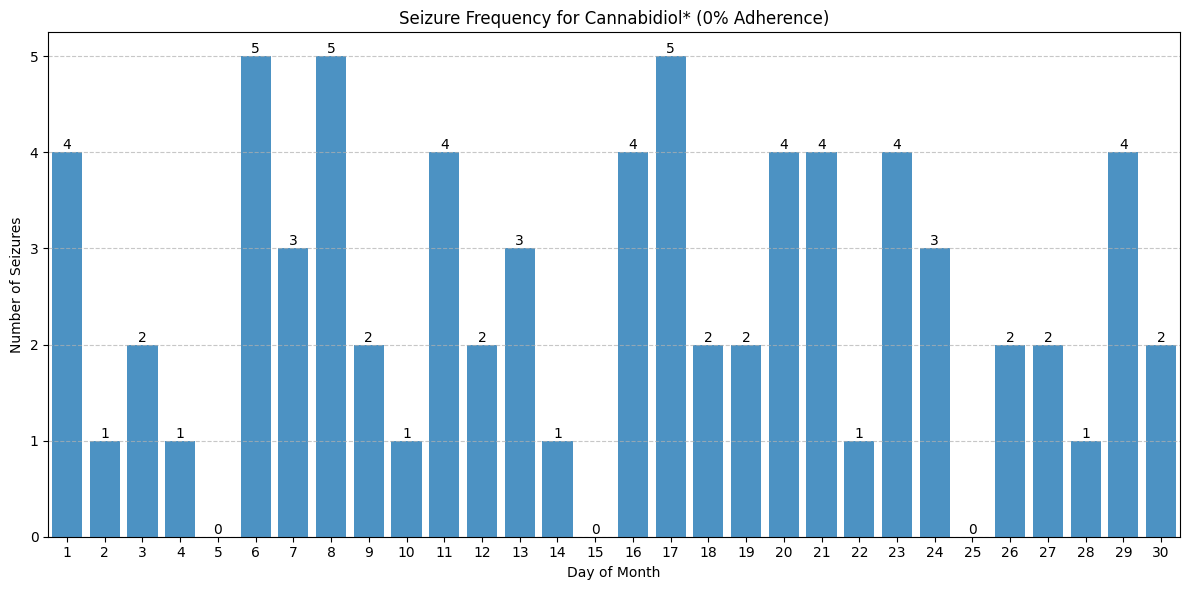

60% Adherence: 61 seizures


<Figure size 640x480 with 0 Axes>

100% Adherence: 68 seizures


<Figure size 640x480 with 0 Axes>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

def load_medicine_database(file_path):
    return pd.read_excel(file_path)

def get_random_drug_info(df):
    drug = df.sample(n=1).iloc[0]
    
    max_dose = drug['Max dose (mg)']
    frequency = drug['Frequency'].lower()
    
    if 'twice' in frequency:
        daily_doses = 2
    elif 'three times' in frequency:
        daily_doses = 3
    else:
        daily_doses = 1
    
    half_life_low = drug['Half Life Low']
    half_life_high = drug['Half Life High']
    half_life = (half_life_low + half_life_high) / 2  # Use average half-life
    
    return {
        'name': drug['Generic'],
        'max_dose': max_dose,
        'daily_doses': daily_doses,
        'half_life': half_life,
        'dosing_schedule': drug['Frequency']
    }

def generate_dose_schedule(days, daily_doses, adherence):
    total_doses = days * daily_doses
    return [1 if random.random() < adherence else 0 for _ in range(total_doses)]

def calculate_efficacy(drug_info, dose_schedule, time_points):
    half_life = drug_info['half_life']
    decay_rate = np.log(2) / half_life
    efficacy = np.zeros_like(time_points, dtype=float)
    
    for i, dose_taken in enumerate(dose_schedule):
        if dose_taken:
            dose_time = i * 24 / drug_info['daily_doses']
            efficacy += np.where(time_points >= dose_time, 
                                 np.exp(-decay_rate * (time_points - dose_time)), 
                                 0)
    
    return efficacy / np.max(efficacy) if np.max(efficacy) > 0 else np.zeros_like(efficacy)

def generate_seizure_diary(days, max_daily_seizures=5):
    return [random.randint(0, max_daily_seizures) for _ in range(days)]

def apply_drug_efficacy(base_seizures, efficacy):
    daily_efficacy = [np.mean(efficacy[day*24:(day+1)*24]) for day in range(len(base_seizures))]
    adjusted_seizures = []
    for seizures, eff in zip(base_seizures, daily_efficacy):
        adjusted = 0
        for _ in range(seizures):
            if random.random() > eff:
                adjusted += 1
        adjusted_seizures.append(adjusted)
    return adjusted_seizures

def plot_seizure_diary(drug_info, seizure_diary, days, adherence):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.bar(range(1, days + 1), seizure_diary, align='center', alpha=0.8)
    
    ax.set_xlabel('Day of Month')
    ax.set_ylabel('Number of Seizures')
    ax.set_title(f"Seizure Frequency for {drug_info['name']} ({adherence*100:.0f}% Adherence)")
    ax.set_xticks(range(1, days + 1))
    ax.set_xlim(0.5, days + 0.5)
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    for i, count in enumerate(seizure_diary):
        ax.text(i + 1, count, str(count), ha='center', va='bottom')

    plt.tight_layout()
    return fig, sum(seizure_diary)

def simulate_seizure_diary(days, adherence):
    file_path = 'MedList.xlsx'  # Update this with the correct file path
    df = load_medicine_database(file_path)
    drug_info = get_random_drug_info(df)
    
    adherence_levels = [0, adherence, 1]
    results = []
    
    base_seizure_diary = generate_seizure_diary(days)
    
    for adh in adherence_levels:
        dose_schedule = generate_dose_schedule(days, drug_info['daily_doses'], adh)
        time_points = np.linspace(0, 24 * days, 24 * days * 60)  # One point per minute
        efficacy = calculate_efficacy(drug_info, dose_schedule, time_points)
        
        seizure_diary = apply_drug_efficacy(base_seizure_diary, efficacy)
        
        fig, seizure_count = plot_seizure_diary(drug_info, seizure_diary, days, adh)
        results.append((fig, seizure_count))
    
    return drug_info, results

def main():
    days = int(input("Enter the number of days for the simulation: "))
    adherence = float(input("Enter the adherence level (0-1): "))
    
    drug_info, results = simulate_seizure_diary(days, adherence)
    
    print(f"\nSimulation Results for {drug_info['name']}:")
    for i, (fig, seizure_count) in enumerate(results):
        adherence_level = [0, adherence, 1][i]
        print(f"{adherence_level*100:.0f}% Adherence: {seizure_count} seizures")
        plt.figure(fig.number)
        plt.show()

if __name__ == "__main__":
    main()

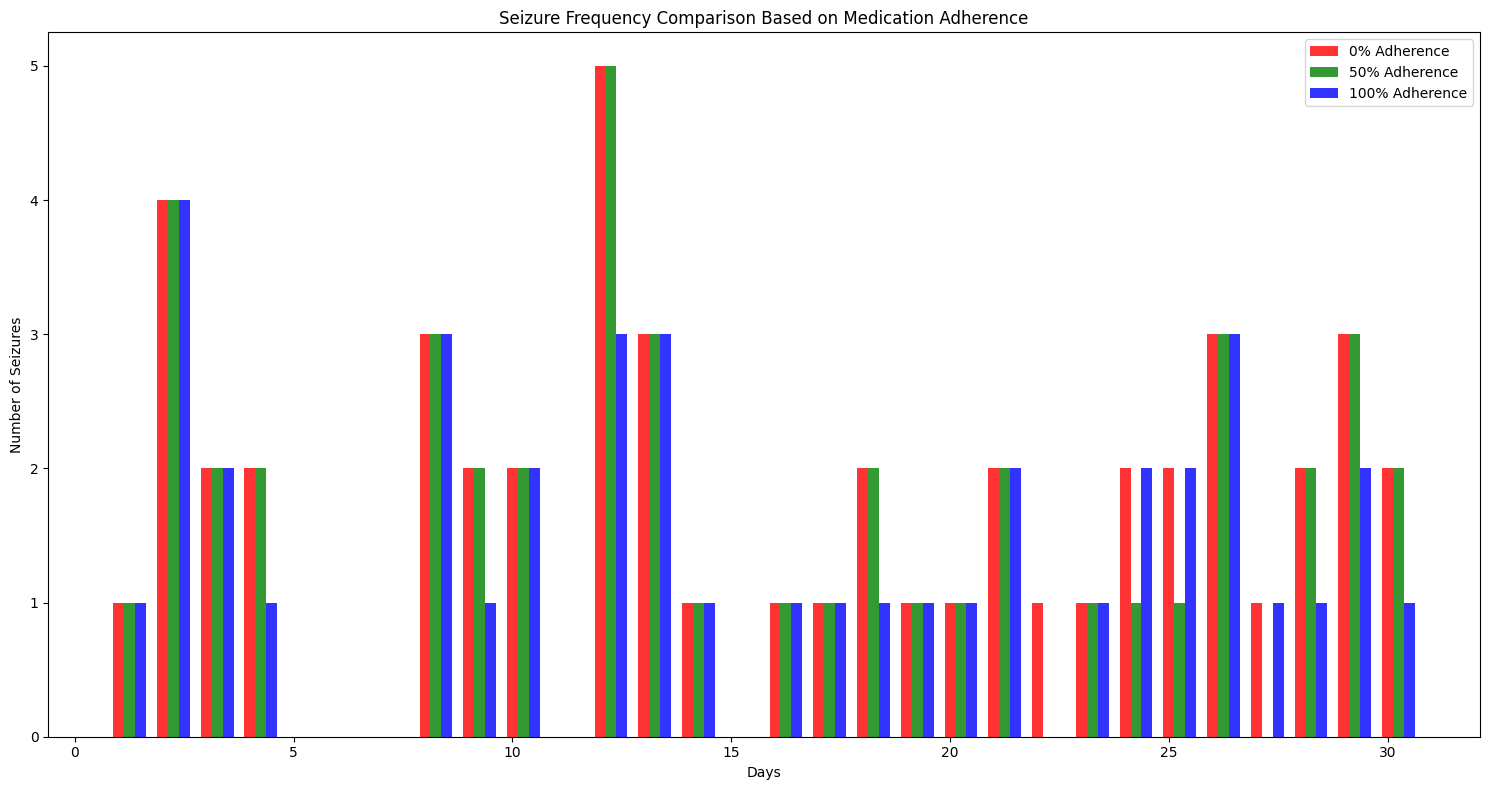


Total seizures over 30 days:
0% Adherence: 50
50% Adherence: 46
100% Adherence: 41

Average seizures per day:
0% Adherence: 1.67
50% Adherence: 1.53
100% Adherence: 1.37


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_base_seizure_diary(num_days, total_seizures):
    np.random.seed(42)  # For reproducibility
    seizures = np.random.multinomial(total_seizures, [1/num_days]*num_days)
    return seizures

def apply_medication_effect(base_seizures, adherence_percentage, efficacy_rate=0.20):
    adjusted_seizures = np.zeros_like(base_seizures)
    for day, seizures in enumerate(base_seizures):
        reduction_probability = efficacy_rate * adherence_percentage
        reduced_seizures = np.random.binomial(seizures, 1 - reduction_probability)
        adjusted_seizures[day] = reduced_seizures
    return adjusted_seizures

def plot_adherence_comparison(base_seizures, given_adherence_seizures, full_adherence_seizures, given_adherence):
    days = range(1, len(base_seizures) + 1)
    
    fig, ax = plt.subplots(figsize=(15, 8))
    
    bar_width = 0.25
    opacity = 0.8
    
    plt.bar(days, base_seizures, bar_width, alpha=opacity, color='r', label='0% Adherence')
    plt.bar([d + bar_width for d in days], given_adherence_seizures, bar_width, alpha=opacity, color='g', label=f'{given_adherence*100:.0f}% Adherence')
    plt.bar([d + 2*bar_width for d in days], full_adherence_seizures, bar_width, alpha=opacity, color='b', label='100% Adherence')
    
    plt.xlabel('Days')
    plt.ylabel('Number of Seizures')
    plt.title('Seizure Frequency Comparison Based on Medication Adherence')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main execution
num_days = int(input("Enter the number of days for the simulation: "))
total_seizures = int(input("Enter the total number of seizures for the entire time period: "))
given_adherence = float(input("Enter the adherence percentage (0-100): ")) / 100

base_seizures = generate_base_seizure_diary(num_days, total_seizures)
given_adherence_seizures = apply_medication_effect(base_seizures, given_adherence)
full_adherence_seizures = apply_medication_effect(base_seizures, 1.0)

# Ensure 100% adherence never has more seizures than 0% adherence
full_adherence_seizures = np.minimum(full_adherence_seizures, base_seizures)
given_adherence_seizures = np.minimum(given_adherence_seizures, base_seizures)

plot_adherence_comparison(base_seizures, given_adherence_seizures, full_adherence_seizures, given_adherence)

print(f"\nTotal seizures over {num_days} days:")
print(f"0% Adherence: {sum(base_seizures)}")
print(f"{given_adherence*100:.0f}% Adherence: {sum(given_adherence_seizures)}")
print(f"100% Adherence: {sum(full_adherence_seizures)}")

print(f"\nAverage seizures per day:")
print(f"0% Adherence: {np.mean(base_seizures):.2f}")
print(f"{given_adherence*100:.0f}% Adherence: {np.mean(given_adherence_seizures):.2f}")
print(f"100% Adherence: {np.mean(full_adherence_seizures):.2f}")